# Dataset

In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from torch.autograd import Variable
import torch

### Dataset 1

[source](https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset)

**Description:**
Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.

The key challenges against it’s detection is how to classify tumors into malignant (cancerous) or benign(non cancerous). We ask you to complete the analysis of classifying these tumors using machine learning (with SVMs) and the Breast Cancer Wisconsin (Diagnostic) Dataset.

**Acknowledgements:**
This dataset has been referred from Kaggle.

**Objective:**
* Understand the Dataset & cleanup (if required).
* Build classification models to predict whether the cancer type is Malignant or Benign.
* Also fine-tune the hyperparameters & compare the evaluation metrics of various classification algorithms.

In [2]:
df1 = pd.read_csv('data/dataset1.csv')
print("Shape:", df1.shape)
df1.head(5)

Shape: (1202, 32)


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_pts_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_pts_worst,symmetry_worst,fractal_dim_worst,diagnostic
0,561,20.47,20.67,134.70,1299.0,0.09156,0.13130,0.15230,0.10150,0.2166,...,27.15,152.00,1645.0,0.1097,0.25340,0.30920,0.16130,0.3220,0.06386,M
1,77,11.75,20.18,76.10,419.8,0.10890,0.11410,0.06843,0.03738,0.1993,...,26.21,88.91,543.9,0.1358,0.18920,0.19560,0.07909,0.3168,0.07987,B
2,151,13.77,13.27,88.06,582.7,0.09198,0.06221,0.01063,0.01917,0.1592,...,16.93,94.17,661.1,0.1170,0.10720,0.03732,0.05802,0.2823,0.06794,B
3,231,12.34,14.95,78.29,469.1,0.08682,0.04571,0.02109,0.02054,0.1571,...,16.85,84.11,533.1,0.1048,0.06744,0.04921,0.04793,0.2298,0.05974,B
4,410,13.80,15.79,90.43,584.1,0.10070,0.12800,0.07789,0.05069,0.1662,...,20.86,110.30,812.4,0.1411,0.35420,0.27790,0.13830,0.2589,0.10300,M


### Dataset 2

[source](https://www.kaggle.com/code/a3amat02/breast-cancer-classification/input)

**About this file**

* y. The outcomes. A factor with two levels denoting whether a mass is malignant ("M") or benign ("B").
* x. The predictors. A matrix with the mean, standard error and worst value of each of 10 nuclear measurements on the slide, for 30 total features per biopsy:
* radius. Nucleus radius (mean of distances from center to points on perimeter).
* texture. Nucleus texture (standard deviation of grayscale values).
* perimeter. Nucleus perimeter.
* area. Nucleus area.
* smoothness. Nucleus smoothness (local variation in radius lengths).
* compactness. Nucleus compactness (perimeter^2/area - 1).
* concavity, Nucleus concavity (severity of concave portions of the contour).
* concave_pts. Number of concave portions of the nucleus contour.
* symmetry. Nucleus symmetry.
* fractal_dim. Nucleus fractal dimension ("coastline approximation" -1).

In [3]:
df2 = pd.read_csv('data/dataset2.csv')
print("Shape:", df2.shape)
df2.head(5)

Shape: (1193, 32)


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_pts_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_pts_worst,symmetry_worst,fractal_dim_worst,diagnostic
0,374,14.68,20.13,94.74,684.5,0.09867,0.07200,0.073950,0.052590,0.1586,...,30.88,123.40,1138.0,0.14640,0.18710,0.29140,0.16090,0.3029,0.08216,M
1,325,12.34,12.27,78.94,468.5,0.09003,0.06307,0.029580,0.026470,0.1689,...,19.27,87.22,564.9,0.12920,0.20740,0.17910,0.10700,0.3110,0.07592,B
2,359,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902,M
3,264,14.80,17.66,95.88,674.8,0.09179,0.08890,0.040690,0.022600,0.1893,...,22.74,105.90,829.5,0.12260,0.18810,0.20600,0.08308,0.3600,0.07285,B
4,161,13.50,12.71,85.69,566.2,0.07376,0.03614,0.002758,0.004419,0.1365,...,16.94,95.48,698.7,0.09023,0.05836,0.01379,0.02210,0.2267,0.06192,B


### Dataset 3

[source](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))

**Data Set Information:**

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. A few of the images can be found at [Web Link]

Separating plane described above was obtained using Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree Construction Via Linear Programming." Proceedings of the 4th Midwest Artificial Intelligence and Cognitive Science Society, pp. 97-101, 1992], a classification method which uses linear programming to construct a decision tree. Relevant features were selected using an exhaustive search in the space of 1-4 features and 1-3 separating planes.

The actual linear program used to obtain the separating plane in the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/


**Attribute Information:**

1) ID number

2) Diagnosis (M = malignant, B = benign)

3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)

In [4]:
df3 = pd.read_csv('data/dataset3.csv')
print("Shape:", df3.shape)
df3.head(5)

Shape: (1189, 32)


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_pts_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_pts_worst,symmetry_worst,fractal_dim_worst,diagnostic
0,529,15.49,19.97,102.40,744.7,0.11600,0.15620,0.18910,0.09113,0.1929,...,29.41,142.10,1359.0,0.1681,0.3913,0.55530,0.21210,0.3187,0.10190,M
1,365,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,28.14,110.60,897.0,0.1654,0.3682,0.26780,0.15560,0.3196,0.11510,M
2,447,13.43,19.63,85.84,565.4,0.09048,0.06288,0.05858,0.03438,0.1598,...,29.87,116.60,993.6,0.1401,0.1546,0.26440,0.11600,0.2884,0.07371,M
3,347,12.77,29.43,81.35,507.9,0.08276,0.04234,0.01997,0.01499,0.1539,...,36.00,88.10,594.7,0.1234,0.1064,0.08653,0.06498,0.2407,0.06484,B
4,27,12.00,15.65,76.95,443.3,0.09723,0.07165,0.04151,0.01863,0.2079,...,24.90,87.78,567.9,0.1377,0.2003,0.22670,0.07632,0.3379,0.07924,B


# Data preprocessing

In [15]:
def scale_dataset(df, overSample=False):
    # split to fetures and diagnostic result
    X = df[df.columns[:-1]].values
    Y = df[df.columns[-1]].values
    
    # standardize the input features 
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    # balance the class distribution
    if overSample:
        ros = RandomOverSampler()
        X, Y = ros.fit_resample(X, Y)

    data = np.hstack((X, np.reshape(Y, (-1, 1))))
    
    # convert to tensor context
    X_train_tensor = Variable(torch.tensor(X, dtype = torch.float32))
    Y_train_tensor = Variable(torch.tensor(Y, dtype = torch.float32))
    data_tensor    = Variable(torch.tensor(data, dtype = torch.float32))
    
    return data_tensor, X_train_tensor, Y_train_tensor

# Logistic Regression

In [21]:
class LogisticRegression(torch.nn.Module):
    def __init__(self, num_features):
        # init super class of LogisticRegression
        super(LogisticRegression, self).__init__()
        
        # create "linear neural network"
        input_dim  = num_features
        output_dim = 1
        self.linear = torch.nn.Linear(input_dim, output_dim)

        # initialize Weights and Bias
        self.linear.weight.detach().zero_()
        self.linear.bias.detach().zero_()

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

In this demo, there are 3 hospitals (with corresponding datasets above) but there could be more hospitals. The 3 hospitals cannot share the cases of their patients because they are competitors and it is necessary to protect the privacy of patients. Hence, the ML model will be learned in a federated way.

# Client

Import openFHE library. Then run `generate_key()`, this is just a python wrapper to run `openfhe-lib/build/key_gen`. After running this files, it will create `openfhe-lib/data` folder that holds:
- `crypto_context.txt` : contain BGV CryptoContext object
- `public_key.txt`     : contain BGV public key
- `private_key.txt`    : contain BGV private key
- `mult_key.txt`       : contain BGV multiplication key

In [6]:
from openfhe_lib.bgv.openFHE import *

# === Generate Key-pairs of BGV Context ===
generate_keys()

First, we start by creating the `Client` class that simulate the computers of each hospital. This just rewrite the Logistic Regression process that we have implemented previously.

In [27]:
class Client:
    def __init__(self, name, data_url, enc_file, n_features, iters):
        self.id = name
        self.enc_file = enc_file  # place wher clients save encrypted weights
        
        # split data into train and test
        self.X_train, self.Y_train, self.X_test, self.Y_test = self.preprocessing(data_url)
        
        # define local training model
        self.local_model = LogisticRegression(n_features)
        
        # some helpfull stuffs
        self.decide_vectorized = np.vectorize(self.decide)
        self.to_percent = lambda x: '{:.2f}%'.format(x)
        self.num_epochs = iters
        self.accuracies = []
        self.losses = []
        
    def preprocessing(self, data_url):
        df = pd.read_csv(data_url)
        # Replace "M" with 1 and "B" with 0 at "diagnostic" column
        df["diagnostic"] = (df["diagnostic"] == "M").astype(int)
        
        # split dataframe to train and test df
        df_train, df_test = np.split(df.sample(frac=1), [int(0.8 * len(df))])
        
        # scaling and convert to tensor context
        train, X_train, Y_train = scale_dataset(df_train, True)
        test , X_test , Y_test  = scale_dataset(df_test , False)
        return X_train, Y_train, X_test, Y_test
    
    def decide(self, y):
        return 1. if y >= 0.5 else 0.
    
    def compute_accuracy(self, input, output):
        prediction = self.local_model(input).data.numpy()[:, 0]
        n_samples = prediction.shape[0] + 0.
        prediction = self.decide_vectorized(prediction)
        equal = prediction == output.data.numpy()
        return 100. * equal.sum() / n_samples
    
    def local_training(self, debug=True):
        n_samples, _ = self.X_train.shape

        # define criterion function and set up optimizer
        criterion = torch.nn.BCELoss(reduction='mean')
        optimizer = torch.optim.SGD(self.local_model.parameters(), lr=0.01)  

        # main process
        for epoch in range(self.num_epochs):  
            optimizer.zero_grad()
            #### Compute outputs ####
            prediction = self.local_model(self.X_train)

            #### Compute gradients ####
            loss = criterion(prediction.squeeze(), self.Y_train)
            loss.backward()

            #### Update weights #### 
            optimizer.step()

            # compute accuracy and loss
            train_acc = self.compute_accuracy(self.X_train, self.Y_train)
            train_loss = loss.item()
                
            self.losses.append(train_loss)
            self.accuracies.append(train_acc)
        
            #### Logging ####
            if debug and (epoch + 1)%50 == 0:
                print('[LOG] Epoch: %05d' % (epoch + 1), end="")
                print('    | Train ACC: %s' % self.to_percent(train_acc), end="")
                print('    | Loss: %.3f' % train_loss)
    
    def encrypted_model_params(self):
        model_weights = self.local_model.linear.weight.data.squeeze().tolist()
        model_bias    = self.local_model.linear.bias.data.squeeze().tolist()
        
        model_params  = model_weights + [model_bias]
        encrypt_weights(model_params, self.enc_file)
        
    def decrypted_model_params(self):
        params = decrypt_weights("/enc_aggregator_weight_server.txt")
        # convert float to tensor context
        W = Variable(torch.tensor([params[:-1]], dtype = torch.float32))
        B = Variable(torch.tensor( params[-1], dtype = torch.float32))
        
        self.local_model.linear.weight = torch.nn.Parameter(W)
        self.local_model.linear.bias   = torch.nn.Parameter(B)
    
    def plot_graphs(self, diagnosis_title = 'Breast cancer'):
        plt.plot(self.losses)
        plt.title(f"{diagnosis_title} - Training Loss")
        plt.xlabel("Iterations")
        plt.ylabel("Training Loss")
        plt.show()
        plt.plot(self.accuracies)
        plt.title(f"{diagnosis_title} - Training Accuracy")
        plt.xlabel("Iterations")
        plt.ylabel("Training Accuracy (Percent %)")
        plt.show()
    
    def print_result_after_training(self):
        print('Model parameters:')
        print('  | Weights: %s' % self.local_model.linear.weight)
        print('  | Bias: %s' % self.local_model.linear.bias)
        self.plot_graphs()
    
    def evaluating_model(self):
        test_acc = self.compute_accuracy(self.X_test, self.Y_test)
        print('[+] Testing Accuracy = {}'.format(self.to_percent(test_acc)))

# Server

We define some functions to train the machine learning model in a federated way while keeping track of the training loss and the training accuracy, for each hospital separately.

In [28]:
clients = [
    Client('Hostpital1', 'data/dataset1.csv', "/enc_weight_client1.txt", n_features=31, iters=10), 
    Client('Hostpital2', 'data/dataset2.csv', "/enc_weight_client2.txt", n_features=31, iters=10),
    Client('Hostpital3', 'data/dataset3.csv', "/enc_weight_client3.txt", n_features=31, iters=10),
    Client('Hostpital4', 'data/dataset4.csv', "/enc_weight_client4.txt", n_features=31, iters=10)
]

The whole process is done in a server aggregator, in 1000 iterations (we can vary the number of iterations.) At each iteration.

In [29]:
from tqdm.notebook import tqdm

iterations = 1000 #2000
worker_iterations = 5
to_percent = lambda x: '{:.2f}%'.format(x)
n_hospitals = len(clients)
n_features = 31
    
def compute_federated_accuracy(model, input, output):
    prediction = model(input)
    n_samples = prediction.shape[0]
    s = 0.
    for i in range(n_samples):
        p = 1. if prediction[i] >= 0.5 else 0.
        e = 1. if p == output[i] else 0.
        s += e
    return 100. * s / n_samples

def federated_learning(clients):
    # init global training model
    global_model = LogisticRegression(n_features)

    # record losses and accuracies report from clients
    losses = [[] for i in range(n_hospitals)]
    accuracies = [[] for i in range(n_hospitals)]
    
    pbar = tqdm(range(iterations), desc='Federated Learning Process')
    for iteration in pbar:
        if iteration:
            # copy global model to clients
            # clients will receive the weight-aggregated from server, extract
            # the ciphertext then decrypt it to get to global_model's weights
            for i in range(n_hospitals):
                clients[i].decrypted_model_params()
        
        # perform local training for each clients then report acc and loss to server
        for i in range(n_hospitals):
            clients[i].local_training(debug=False)
            
            # report to server
            losses[i].append(clients[i].losses[-1])
            accuracies[i].append(clients[i].accuracies[-1])
        
        # clients encrypt the final weights of local model after training
        for i in range(n_hospitals):
            clients[i].encrypted_model_params()
        
        # server collect clients's encrypted weights then perform weight-aggregation
        # by using homomorphic operation
        with torch.no_grad():
            # avg_weight = sum([clients[i].local_model.linear.weight.data for i in range(n_hospitals)]) / n_hospitals
            # global_model.linear.weight = nn.Parameter(avg_weight)
            # avg_bias = sum([clients[i].local_model.linear.bias.data for i in range(n_hospitals)]) / n_hospitals
            # global_model.linear.bias = nn.Parameter(avg_bias)
            aggregator()
    
        # logging
        if (iteration + 1) % 100 == 0:
            losses_str = ['{:.4f}'.format(losses[i][-1]) for i in range(n_hospitals)]
            accuracies_str = [to_percent(accuracies[i][-1]) for i in range(n_hospitals)]
            print('[LOG] Epoch = {0:04d}\n> Losses = {1}\n> Accuracies = {2}'.format(iteration + 1, losses_str, accuracies_str))
        
    return losses, accuracies

In [30]:
losses, accuracies = federated_learning(clients)

Federated Learning Process:   0%|          | 0/1000 [00:00<?, ?it/s]

[LOG] Epoch = 0100
> Losses = ['0.0736', '0.0546', '0.0582', '0.0742']
> Accuracies = ['97.49%', '98.71%', '98.57%', '97.44%']
[LOG] Epoch = 0200
> Losses = ['0.0576', '0.0387', '0.0436', '0.0581']
> Accuracies = ['98.10%', '98.80%', '99.08%', '97.44%']
[LOG] Epoch = 0300
> Losses = ['0.0502', '0.0320', '0.0374', '0.0506']
> Accuracies = ['98.40%', '99.10%', '99.39%', '97.73%']
[LOG] Epoch = 0400
> Losses = ['0.0459', '0.0281', '0.0338', '0.0459']
> Accuracies = ['98.70%', '99.30%', '99.39%', '98.01%']
[LOG] Epoch = 0500
> Losses = ['0.0430', '0.0256', '0.0315', '0.0427']
> Accuracies = ['98.70%', '99.30%', '99.29%', '98.30%']
[LOG] Epoch = 0600
> Losses = ['0.0408', '0.0238', '0.0297', '0.0403']
> Accuracies = ['98.80%', '99.60%', '99.39%', '98.30%']
[LOG] Epoch = 0700
> Losses = ['0.0392', '0.0225', '0.0284', '0.0384']
> Accuracies = ['98.80%', '99.80%', '99.39%', '98.30%']
[LOG] Epoch = 0800
> Losses = ['0.0378', '0.0214', '0.0273', '0.0369']
> Accuracies = ['98.90%', '99.80%', '99.

# Virtualize record of training process

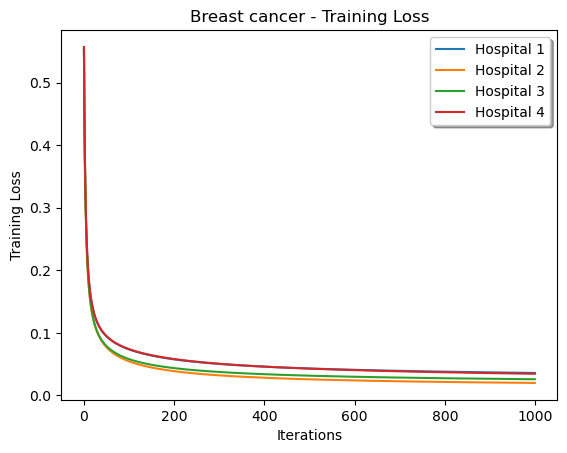

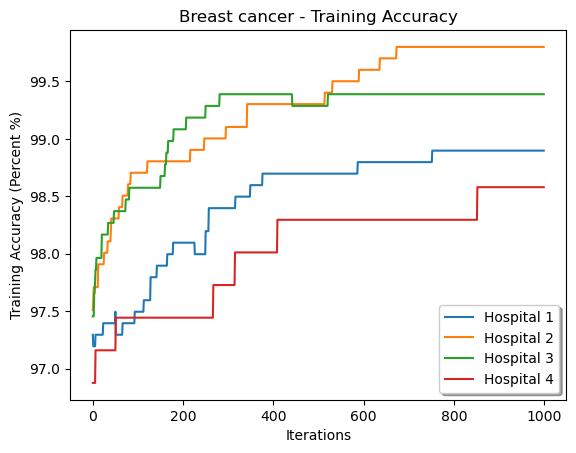

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_federated_graphs(diagnosis_title, losses, accuracies):
    for i in range(n_hospitals):
        plt.plot(losses[i], label=f'Hospital {i+1}')
    legend = plt.legend(loc='upper right', shadow=True)
    plt.title(f"{diagnosis_title} - Training Loss")
    plt.xlabel("Iterations")
    plt.ylabel("Training Loss")
    plt.show()
    for i in range(n_hospitals):
        plt.plot(accuracies[i], label=f'Hospital {i+1}')
    legend = plt.legend(loc='lower right', shadow=True)
    plt.title(f"{diagnosis_title} - Training Accuracy")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy (Percent %)")
    plt.show()

plot_federated_graphs('Breast cancer', losses, accuracies)

# Model parameters after training proccess

In [32]:
clients[0].decrypted_model_params()
global_model = clients[0].local_model

print('\nModel parameters:')
print('  | Weights: %s' % global_model.linear.weight) ### Virtualize record of training processlobal_model.linear.weight)
print('  | Bias: %s' % global_model.linear.bias)


Model parameters:
  | Weights: Parameter containing:
tensor([[-0.8021,  0.7622,  0.0866,  0.7742,  0.5779,  0.2074,  0.0919,  0.6327,
          0.7113,  0.0116, -0.5966,  0.5475, -0.3451,  0.4512,  0.5696, -0.0984,
         -0.0132,  0.0754,  0.3081, -0.2541, -0.4002,  0.8674,  0.3452,  0.9083,
          0.7603,  0.1902,  0.5486,  0.2862,  0.7505,  0.5693,  0.1809]],
       requires_grad=True)
  | Bias: Parameter containing:
tensor(0.7181, requires_grad=True)


#  Evaluating the Model

In [34]:
# prepare data for testing model
df_test = pd.read_csv('data/test.csv')
df_test["diagnostic"] = (df_test["diagnostic"] == "M").astype(int)
test , X_test , Y_test  = scale_dataset(df_test , False)

test_acc = compute_federated_accuracy(global_model, X_test, Y_test)
print('\nTesting Accuracy = {}'.format(to_percent(test_acc)))


Testing Accuracy = 87.76%
